# 한글

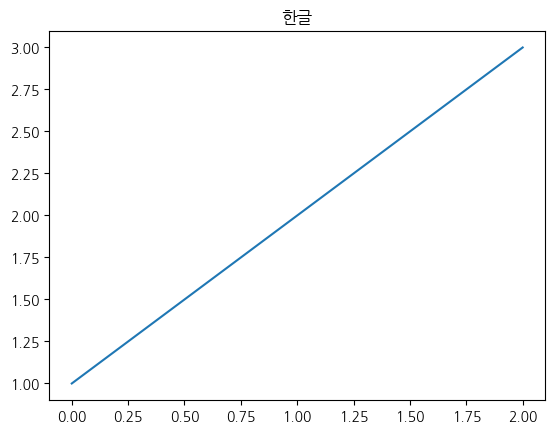

In [1]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

plt.rc("font", family="NanumGothic") # 라이브러리 불러오기와 함께 한번만 실행
from sklearn.preprocessing import MinMaxScaler, StandardScaler

plt.plot([1, 2, 3])
plt.title("한글")
plt.show()

# 위아래 합 1퍼센트 제거 데이터프레임의 시작

## 데이터 다시 불러오기

In [2]:
ULS_df = pd.read_csv("data/전처리ver1/울산_전처리ver1.csv")
PUS_df = pd.read_csv("data/전처리ver1/부산_전처리ver1.csv")
INC_df = pd.read_csv("data/전처리ver1/인천_전처리ver1.csv")
KAN_df = pd.read_csv("data/전처리ver1/광양_전처리ver1.csv")

In [3]:
sorted_ULS_df = ULS_df.sort_values(by='대기율', ascending=True)
sorted_PUS_df = PUS_df.sort_values(by='대기율', ascending=True)
sorted_INC_df = INC_df.sort_values(by='대기율', ascending=True)
sorted_KAN_df = KAN_df.sort_values(by='대기율', ascending=True)
sorted_KAN_df.head(5)

,항명,호출부호,선박명,입항횟수_연도,입항횟수_횟수,구분,입출,총톤수,입항일시,출항일시,수리일시,항해구분,계선장소_코드,계선장소_숫자,계선장소명,선박용도,순번,시설사용횟수,신고톤수,지정시설_코드,지정시설_번호,지정시설명,지정일시(FROM),지정일시(TO),사용목적명,예보일시,허가유무,접안_대기시간,출항_대기시간,Service_Time_End,Anchor,Service_Time_Start,Service_Time,접안_대기시간_NumDays,Service_Time_NumDays,접안_대기시간_일,접안_대기시간_시간,접안_대기시간_분,Service_Time_일,Service_Time_시간,Service_Time_분,대기율
17221,광양,300KOREX,KOREX YEOSU,2022,11,최종,출항,"9,938",2022-11-20 17:30,2022-11-23 06:50,2022-12-26 09:18,기타,MBB,02,낙포석탄부두 2번선석,산물선(벌크선),1284.0,7.0,9.938,WAK,02,2정박지,2022-12-01 23:15:00,2022-12-02 06:30:00,접안대기,2022-12-26,허가완료,0 days 07:15:00,NaN,2022-11-23 06:50:00,2022-12-01 23:15:00,2022-12-01 23:15:00,-9 days +07:35:00,0,-9,0,7,435,-9,7,-12505,-0.034786
17218,광양,300KOREX,KOREX YEOSU,2022,11,최종,출항,"9,938",2022-11-20 17:30,2022-11-23 06:50,2022-12-26 09:18,기타,MBB,02,낙포석탄부두 2번선석,산물선(벌크선),1281.0,4.0,9.938,WAK,01,1정박지,2022-11-29 18:45:00,2022-11-29 20:44:00,접안대기,2022-12-26,허가완료,0 days 01:59:00,NaN,2022-11-23 06:50:00,2022-11-29 18:45:00,2022-11-29 18:45:00,-7 days +12:05:00,0,-7,0,1,119,-7,12,-9355,-0.012720
12267,광양,202823,20청우호,2022,38,최종,출항,299,2022-08-23 05:30,2022-08-23 07:30,2022-08-23 09:20,기타,MB4,05,제품부두 45선석,급유선,1237.0,1.0,299.000,MB4,05,제품부두 45선석,2022-08-23 05:30:00,2022-08-23 07:30:00,적하,2022-08-23,허가완료,0 days 00:00:00,NaN,2022-08-23 07:30:00,NaN,2022-08-23 05:30:00,0 days 02:00:00,0,0,0,0,0,0,2,120,0.000000
12266,광양,108674,동방글로리,2022,41,최종,출항,"3,812",2022-08-23 05:20,2022-08-24 16:40,2022-08-31 13:22,기타,MB3,01,RO-RO부두 31선석,철강재 운반선,1804.0,1.0,3.812,MB3,01,RO-RO부두 31선석,2022-08-23 05:20:00,2022-08-24 16:40:00,적하,2022-08-31,허가완료,0 days 00:00:00,NaN,2022-08-24 16:40:00,NaN,2022-08-23 05:20:00,1 days 11:20:00,0,1,0,0,0,1,11,2120,0.000000
12265,광양,DSQB2,강남스타,2022,6,최종,출항,266,2022-08-23 05:15,2022-08-23 20:30,2022-08-24 14:13,기타,MWO,01,율촌소형선부두,견인용예선,1345.0,1.0,2.246,MWO,01,율촌소형선부두,2022-08-23 05:15:00,2022-08-23 20:30:00,적하,2022-08-24,허가완료,0 days 00:00:00,NaN,2022-08-23 20:30:00,NaN,2022-08-23 05:15:00,0 days 15:15:00,0,0,0,0,0,0,15,915,0.000000


In [4]:
percentage_to_drop = int(len(sorted_ULS_df) * 0.005)
PER1_ULS = sorted_ULS_df[percentage_to_drop:-percentage_to_drop]

percentage_to_drop = int(len(sorted_PUS_df) * 0.005)
PER1_PUS = sorted_PUS_df[percentage_to_drop:-percentage_to_drop]

percentage_to_drop = int(len(sorted_INC_df) * 0.005)
PER1_INC = sorted_INC_df[percentage_to_drop:-percentage_to_drop]

percentage_to_drop = int(len(sorted_KAN_df) * 0.005)
PER1_KAN = sorted_KAN_df[percentage_to_drop:-percentage_to_drop]

# 선종별 / 컨테이너, 비 컨테이너선 시각화 시작

General Cargo Ship(A), Full-Containership(B), Oil Products Carrier(C), <br>
Bulk Carrier(D), Chemical Tanker(E), Passenger Ship(F),  <br>
Cement Carrier(G), Car Carrier(H), Refrigerator Carrier(I), <br>
LPG Carrier(J), Other Oil Carrier(K), Int’l Car-Ferry(L), <br>
Crude Oil Carrier(M), Coil-Dedicated Ship(N), Sand Carrier(O), <br>
Semi-Containership(P), Steel Product Carrier(Q), LNG Carrier(R), <br>
Cargo-Passenger Ship(S), Chemical Gas Carrier(T),  <br>
Hot Coil Carrier(U), Cruise Ship(V), Coal Carrier(W), Ore Carrier(X) <br>

[total : 24 types]

= > 다음의 분류과정의 필요

## 현재 우리 칼럼의 종류

In [5]:
PER1_ULS['선박용도'].value_counts()

선박용도
석유제품 운반선       29378
케미칼 운반선         7019
LPG 운반선         1900
일반화물선           1528
견인용예선           1463
풀컨테이너선          1252
기타 유조선          1209
자동차운반선          1048
원유운반선           1036
산물선(벌크선)         828
급유선              725
기타 예선            713
시멘트운반선           197
케미칼가스 운반선        179
기타선              148
압항 예선             85
모래운반선             82
신조선               79
이.접안용 예선          69
폐기물 운반선           41
철강재 운반선           40
관공선               33
LNG 운반선           18
코일전용선             14
세미(혼재)컨테이너선       14
용달선               12
여객선                6
군함                 6
수상레저기구             1
냉동.냉장선             1
유람선                1
원양 어선              1
Name: count, dtype: int64

## 딕셔너리로 값을 치환

In [6]:
# 바꾸고 싶은 값들의 대응관계를 딕셔너리로 정의
change_dict = {'석유제품 운반선' : 'C',
               '케미칼 운반선' : 'E',
               'LPG 운반선' : 'J',
               '일반화물선' : 'A',
               '풀컨테이너선' : 'B',
               '기타 유조선' : 'K',
               '자동차운반선' : 'H',
               '원유운반선' : 'M',
               '산물선(벌크선)' : 'D',
               '급유선' : 'U',
               '시멘트운반선' : 'G',
               '케미칼가스 운반선' : 'T',
               '모래운반선' : 'O',
               '이.접안용 예선' : 'L',
               '철강재 운반선' : 'Q',
               'LNG 운반선' : 'R',
               '코일전용선' : 'N',
               '세미(혼재)컨테이너선' : 'P',
               '여객선' : 'F',
               '냉동.냉장선' : 'I',
               '유람선' : 'V',
               '원양 어선' : 'X',
               '석탄운반선' : 'W'
}

# '선박용도' 칼럼에서 값들을 대응하는 값으로 변경
PER1_ULS['선박용도'] = PER1_ULS['선박용도'].replace(change_dict)
PER1_ULS.head(3)

,항명,호출부호,선박명,입항횟수_연도,입항횟수_횟수,구분,입출,총톤수,입항일시,출항일시,수리일시,항해구분,계선장소_코드,계선장소_숫자,계선장소명,선박용도,순번,시설사용횟수,신고톤수,지정시설_코드,지정시설_번호,지정시설명,지정일시(FROM),지정일시(TO),사용목적명,예보일시,허가유무,접안_대기시간,출항_대기시간,Service_Time_End,Anchor,Service_Time_Start,Service_Time,접안_대기시간_NumDays,Service_Time_NumDays,접안_대기시간_일,접안_대기시간_시간,접안_대기시간_분,Service_Time_일,Service_Time_시간,Service_Time_분,대기율
32014,울산,070928,태정호,2022.0,12.0,최종,출항,191,2022-08-15 13:15,2022-12-26 04:55,2022-12-26 17:31,기타,MLJ,1,장생포호안,C,3511.0,167.0,191,WAE,2.0,정박지-E2,2022-12-07 21:00:00,2022-12-08 04:20:00,기타,2022-12-26,허가완료,0 days 00:00:00,NaN,2022-12-26 04:55:00,NaN,2022-08-15 13:15:00,132 days 15:40:00,0,132,0,0,0,132,15,191020,0.0
32015,울산,070928,태정호,2022.0,12.0,최종,출항,191,2022-08-15 13:15,2022-12-26 04:55,2022-12-26 17:31,기타,MLJ,1,장생포호안,C,3512.0,168.0,191,MLJ,1.0,장생포호안,2022-12-08 05:10:00,2022-12-11 13:50:00,기타,2022-12-26,허가완료,0 days 00:00:00,NaN,2022-12-26 04:55:00,NaN,2022-08-15 13:15:00,132 days 15:40:00,0,132,0,0,0,132,15,191020,0.0
32016,울산,070928,태정호,2022.0,12.0,최종,출항,191,2022-08-15 13:15,2022-12-26 04:55,2022-12-26 17:31,기타,MLJ,1,장생포호안,C,3513.0,169.0,191,MBN,12.0,현대오일터미널신항부두,2022-12-11 14:50:00,2022-12-11 16:25:00,기타,2022-12-26,허가완료,0 days 00:00:00,NaN,2022-12-26 04:55:00,NaN,2022-08-15 13:15:00,132 days 15:40:00,0,132,0,0,0,132,15,191020,0.0


## 잘 됐나 확인

In [7]:
# '선박용도' 칼럼 값이 주어진 리스트에 포함된 행만 추출
fil_concat = PER1_ULS[PER1_ULS['선박용도'].isin(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'T', 'U', 'V', 'W', 'X'])]
# S = 화물 및 여객선인데 부존재함
fil_concat['선박용도'].value_counts()

선박용도
C    29378
E     7019
J     1900
A     1528
B     1252
K     1209
H     1048
M     1036
D      828
U      725
G      197
T      179
O       82
L       69
Q       40
R       18
N       14
P       14
F        6
I        1
V        1
X        1
Name: count, dtype: int64

## 선박 용도별 평균 대기율

In [8]:
average_by_ship_purpose = {}
for char in 'ABCDEFGHIJKLMNOPQRSTUVWX':
    average = fil_concat[fil_concat['선박용도'] == char]['대기율'].mean()
    average_by_ship_purpose[char] = average*100

In [9]:
average_by_ship_purpose

{'A': 7.182444059850382,
 'B': 0.10147439213874096,
 'C': 6.083872830261734,
 'D': 8.403433104192832,
 'E': 9.001012475846354,
 'F': 22.393132881883034,
 'G': 0.0,
 'H': 0.6460075378764979,
 'I': 0.0,
 'J': 7.909195294245295,
 'K': 0.9925691341563004,
 'L': 0.0,
 'M': 6.2497763259633405,
 'N': 0.0,
 'O': 2.6111452152550343,
 'P': 4.293400968653127,
 'Q': 2.1151293961512936,
 'R': 0.0,
 'S': nan,
 'T': 5.460788480991345,
 'U': 1.4017777364789152,
 'V': 0.0,
 'W': nan,
 'X': 0.0}

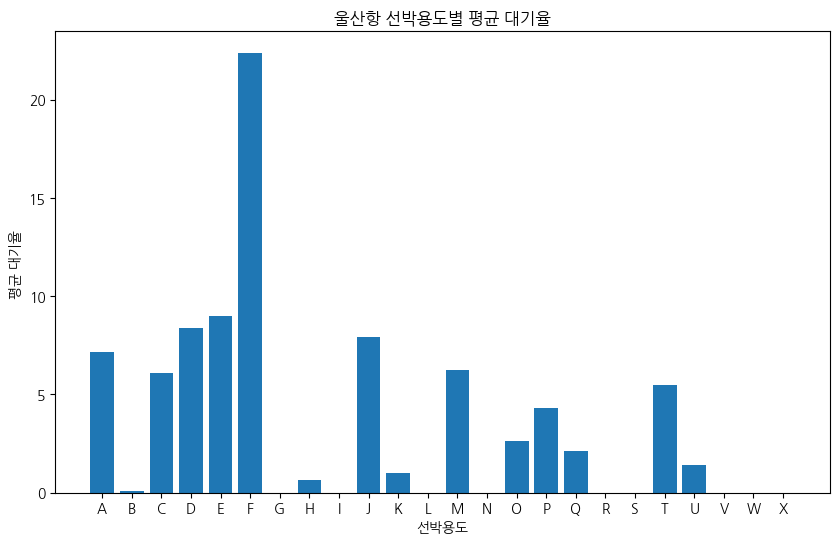

In [10]:
# 막대 그래프 생성
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(average_by_ship_purpose.keys(), average_by_ship_purpose.values())

# 그래프 제목과 레이블 설정
ax.set_title('울산항 선박용도별 평균 대기율')
ax.set_xlabel('선박용도')
ax.set_ylabel('평균 대기율 ')

# 그래프 표시
plt.show()

## 컨테이너 / 비컨테이너

### 컨테이너

In [11]:
Cont = PER1_ULS[PER1_ULS['선박용도'].isin(['B', 'P'])]['대기율'].mean()*100

### 비컨테이너

In [12]:
Non_Cont= PER1_ULS[~PER1_ULS['선박용도'].isin(['B', 'P'])]['대기율'].mean()*100

### 둘의 차이 비교 그래프

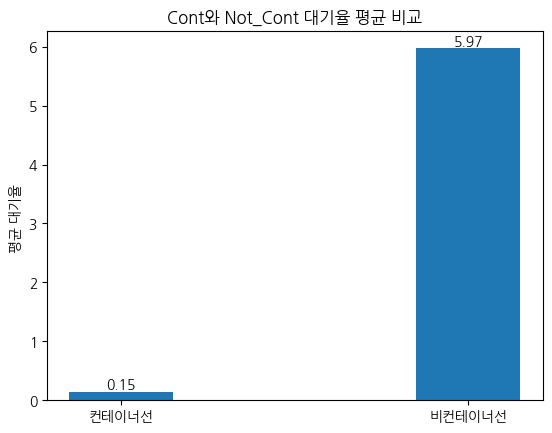

In [29]:
# 막대 그래프 생성
categories = ['컨테이너선', '비컨테이너선']
values = [Cont, Non_Cont]

fig, ax = plt.subplots()
bars = ax.bar(categories, values, width=0.3)  # width 조절

# 각 막대에 대한 수치 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center', color='black', fontsize=10)

# 그래프 제목과 레이블 설정
ax.set_title('Cont와 Not_Cont 대기율 평균 비교')
ax.set_ylabel('평균 대기율 ')

# 그래프 표시
plt.show()


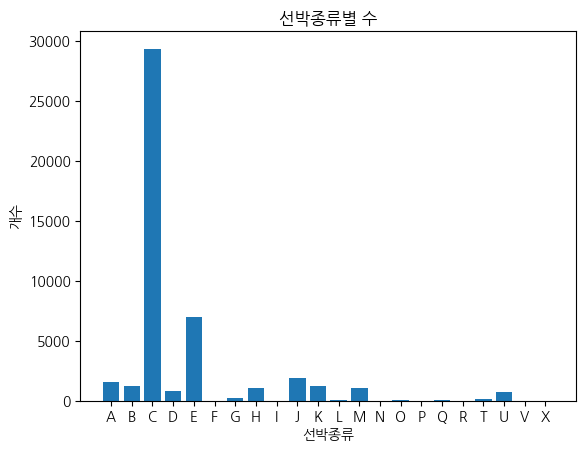

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# 각 선박 개수 계산
alphabet_counts = fil_concat['선박용도'].value_counts().sort_index()

# 막대그래프 그리기
plt.bar(alphabet_counts.index, alphabet_counts.values)
plt.xlabel('선박종류')
plt.ylabel('개수')
plt.title('선박종류별 수')
plt.show()


In [19]:
# 울산 각 선박 종류별로 차지하는 비율

In [20]:
fil_concat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46545 entries, 32014 to 13363
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   항명                    46545 non-null  object 
 1   호출부호                  46545 non-null  object 
 2   선박명                   46545 non-null  object 
 3   입항횟수_연도               46545 non-null  float64
 4   입항횟수_횟수               46545 non-null  float64
 5   구분                    46545 non-null  object 
 6   입출                    46545 non-null  object 
 7   총톤수                   46545 non-null  object 
 8   입항일시                  46545 non-null  object 
 9   출항일시                  46545 non-null  object 
 10  수리일시                  46542 non-null  object 
 11  항해구분                  46545 non-null  object 
 12  계선장소_코드               46545 non-null  object 
 13  계선장소_숫자               46545 non-null  int64  
 14  계선장소명                 46545 non-null  object 
 15  선박용도                

In [22]:
data = {
    '선박종류': ['C', 'E', 'J', 'A', 'B', 'K', 'H', 'M', 'D', 'U', 'G', 'T', 'O', 'L', 'Q', 'R', 'N', 'P', 'F', 'I', 'V', 'X'],
    '비중': [29378/46545, 7019/46545, 1900/46545, 1528/46545, 1252/46545, 1209/46545, 1048/46545, 1036/46545, 828/46545, 725/46545, 197/46545, 179/46545, 82/46545, 69/46545, 40/46545, 18/46545, 14/46545, 14/46545, 6/46545, 1/46545, 1/46545, 1/46545]
}

T_df = pd.DataFrame(data)
T_df['비중']=T_df['비중']*100

In [23]:
T_df

,선박종류,비중
0,C,63.117413
1,E,15.080030
2,J,4.082071
3,A,3.282845
4,B,2.689870
5,K,2.597486
6,H,2.251584
7,M,2.225803
8,D,1.778924
9,U,1.557632
